In [1]:
# #Important package for NLP
# ! pip install nltk
# ! pip install -U spacy
# ! pip install textblob
# ! pip install scikit-learn

# # for data manupulation, cleansing and plotting
# ! pip install pandas
# ! pip install matplotlib
# ! pip install numpy
# ! pip install plotly


# ! pip list  #check installed packages
# ! pip freeze > requirements.txt #save installed packages to requirements.txt

In [2]:
import re

import pandas as pd
import numpy as np

import nltk #natural language toolkit

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt


# !python -m spacy download en


import spacy
from nltk.stem import PorterStemmer

nlp = spacy.load('en_core_web_sm')

In [3]:
# Reading the training and testing dataset
df_data = pd.read_csv('./data/train.csv')
# df_test_orginal = pd.read_csv('./data/test.csv')

# df_train= df_train_orginal.sample(n=1000) #sampling  the data to make it faster
# df_test= df_test_orginal.sample(n=1000)#sampling only 1000 rows randomly

# df_data= df_train_orginal.sample(n=10000) #sampling 10000 from 3 lakh data  the data to make it faster
df_data.head()

,id,abstract,category,category_num
0,271675,Bacteria are often exposed to multiple stimu...,q-bio-QM,138
1,412276,Accurate knowledge of the thermodynamic prop...,hep-ph-,68
2,256956,The largest X9.3 solar flare in solar cycle ...,astro-ph-SR,7
3,427612,We say that a random integer variable $X$ is...,math-PR,93
4,113852,We derive a formula expressing the joint dis...,math-CO,76


In [4]:
# # Distribution of data among the category
# import pandas as pd
# pd.options.plotting.backend = "plotly"

# fig=df_train_orginal['category'].value_counts().plot(kind='bar')
# fig.show()

In [5]:
# count number of categories
df_cat_count=df_data[['category','category_num']].value_counts().to_frame()
#reset index
df_cat_count=df_cat_count.reset_index()

#rename columns
df_cat_count.columns=['category','category_num','count']

#save to csv
df_cat_count.to_csv('category_count.csv' , index=False)

df_cat_count.head()


,category,category_num,count
0,cs-LG,40,23414
1,cs-CV,25,22943
2,quant-ph-,150,14561
3,cs-CL,23,11143
4,hep-ph-,68,10863


In [6]:
# ps = PorterStemmer()
# lem= WordNetLemmatizer()

In [7]:
# def clean_abstract(text):
#   text = re.sub('[^a-z\s]', ' ', text.lower())
#   text = [i.lower() for i in text.split() if i not in nlp.Defaults.stop_words]
#   text = [ps.stem(i) for i in text]
#   text = ' '.join(text)
#   text.replace('\n',' ')
#   return text

In [8]:
# df_train['abstract'] = df_train['abstract'].apply(clean_abstract)
# df_test['abstract'] = df_test['abstract'].apply(clean_abstract)

# df_train.head()

In [9]:
# from sklearn.feature_extraction.text import CountVectorizer
# from nltk.tokenize import RegexpTokenizer

# #tokenizer to remove unwanted elements from out data like symbols and numbers
# token = RegexpTokenizer(r'[a-zA-Z0-9]+')
# cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
# text_counts= cv.fit_transform(df_data['abstract'])
# text_counts.shape


In [10]:
# from sklearn.feature_extraction.text import TfidfTransformer
# tfidf_transformer = TfidfTransformer()
# text_counts_tfidf = tfidf_transformer.fit_transform(text_counts)
# text_counts_tfidf.shape

In [11]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     text_counts_tfidf, df_data['category_num'], test_size=0.3, random_state=1)


In [12]:
# from sklearn.naive_bayes import MultinomialNB
# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics
# # Model Generation Using Multinomial Naive Bayes
# clf = MultinomialNB().fit(X_train, y_train)
# predicted= clf.predict(X_test)
# print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

In [13]:
# import cufflinks as cf
# cf.go_offline()
# cf.set_config_file(offline=False, world_readable=True)

# df_data['category'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='no. belonging to category ', title='Category Distribution')

In [14]:

import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

df_data = df_data.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
    # text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df_data['abstract'] = df_data['abstract'].apply(clean_text)
df_data['abstract'] = df_data['abstract'].str.replace('\d+',' ')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\074be\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df_data.head()


,id,abstract,category,category_num
0,271675,bacteria often eposed multiple stimuli comple ...,q-bio-QM,138
1,412276,accurate knowledge thermodynamic properties ze...,hep-ph-,68
2,256956,largest solar flare solar cycle preceding ...,astro-ph-SR,7
3,427612,say random integer variable monotone modulus t...,math-PR,93
4,113852,derive formula epressing joint distribution cy...,math-CO,76


In [18]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS =50000
# Max number of words in each abstract
MAX_SEQUENCE_LENGTH = 300
# This is fixed.
EMBEDDING_DIM = 100

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True) 
tokenizer.fit_on_texts(df_data['abstract'].values) # fit the tokenizer on the abstracts

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))



Found 1833192 unique tokens.


In [21]:
# type(word_index)

# #convert dictionary to dataframe
# df_word_index=pd.DataFrame.from_dict(word_index, orient='index')

# df_word_index.reset_index(inplace=True)

# df_word_index.columns=['word','index_number']


# #save to csv
# df_word_index.to_csv('word_index.csv',index=False)

In [22]:
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(df_data['abstract'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (390603, 300)


In [23]:

Y = pd.get_dummies(df_data['category']).values
print('Shape of label tensor:', Y.shape)


Shape of label tensor: (390603, 156)


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(351542, 300) (351542, 156)
(39061, 300) (39061, 156)


In [25]:
len(Y[1])

156

In [26]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [27]:


# model = Sequential()
# model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
# model.add(SpatialDropout1D(0.2))
# model.add(LSTM(10, dropout=0.2, recurrent_dropout=0))
# model.add(Dense(len(Y[1]), activation='tanh'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()
# epochs = 5
# batch_size= 64

# history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


In [28]:
# # save trained model to disk
# model.save('./Test_model/model1.h5')

# # # import load model module 

from keras.models import *
new_model = load_model('./Saved_model\modelcolabbest.h5')

In [29]:
accr = new_model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

  12/1221 [..............................] - ETA: 18:46 - loss: 6.1461 - accuracy: 0.0781

KeyboardInterrupt: 

NameError: name 'history' is not defined

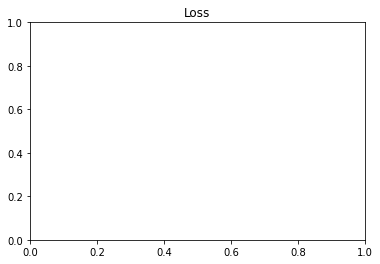

In [111]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

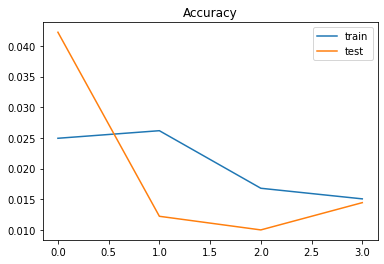

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [35]:
column_names = ['id','category_num']

df_solution = pd.DataFrame(columns = column_names)
df_solution

,id,category_num


In [36]:
df_test=pd.read_csv('./data/test.csv')
# df_test

## copy 'id' column of test.csv to "Id" column of df_solution
df_solution.id=df_test.id   # or use below method
# df_solution["id"]=df_test["id"].values
df_test.head()

# df_solution

,id,abstract
0,430065,Depth maps obtained by commercial depth sens...
1,75226,When lambda expressions were introduced to t...
2,301990,We propose and demonstrate that a gamma-gamm...
3,301001,"In physics labs, students experience a wide ..."
4,280179,The existence of local minima for one-hidden...


In [114]:
####  Test manually
new_abstract = ["The point process is a solid framework to model sequential data, such as videos, by exploring the underlying relevance. As a challenging problem for high-level video understanding, weakly supervised action recognition and localization in untrimmed videos has attracted intensive research attention. Knowledge transfer by leveraging the publicly available trimmed videos as external guidance is a promising attempt to make up for the coarse-grained video-level annotation and improve the generalization performance. However, unconstrained knowledge transfer may bring about irrelevant noise and jeopardize the learning model. This paper proposes a novel adaptability decomposing encoder-decoder network to transfer reliable knowledge between trimmed and untrimmed videos for action recognition and localization via bidirectional point process modeling, given only video-level annotations. By decomposing the original features into domain-adaptable and domain-specific ones based on their adaptability, trimmed-untrimmed knowledge transfer can be safely confined within a more coherent subspace. An encoder-decoder based structure is carefully designed and jointly optimized to facilitate effective action classification and temporal localization. Extensive experiments are conducted on two benchmark datasets (i.e., THUMOS14 and ActivityNet1.3), and experimental results clearly corroborate the efficacy of our method.  "]



seq = tokenizer.texts_to_sequences(new_abstract)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = new_model.predict(padded)
print(np.argmax(pred))

25


In [121]:


df_test_no_id.head()

,abstract
0,Depth maps obtained by commercial depth sens...
1,When lambda expressions were introduced to t...
2,We propose and demonstrate that a gamma-gamm...
3,"In physics labs, students experience a wide ..."
4,The existence of local minima for one-hidden...


In [37]:
for index, row in df_test.iterrows():
    new_abstract = [row['abstract']]
    seq = tokenizer.texts_to_sequences(new_abstract)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = new_model.predict(padded)
    print ('Currently processing Index no.:  ', index, 'and prediction is: ', pred.argmax())
#     df_solution.loc[index,'Category_num'] = pred.argmax()
    

# # remove id column of df_test
# df_test_no_id=df_test.drop(['id'],axis=1)


# def tok_seq(text):
#     new_abstract = [text]
#     seq = tokenizer.texts_to_sequences(new_abstract)
#     padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
#     # pred = new_model.predict(padded)
#     # print(pred.argmax())
#     return pred.argmax()


# df_test_tok_seq=df_test_no_id['abstract'].apply(tok_seq)





# # df_test_tok_seq
# test_prediction







# def predict_category(text):
#     new_abstract = [text]
#     seq = tokenizer.texts_to_sequences(new_abstract)
#     padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
#     pred = new_model.predict(padded)
#     # print(pred.argmax())
#     return pred.argmax()


# df_solution['category_num'] = df_test['abstract'].apply(predict_category)


    

    

Currently processing Index no.:   0 and prediction is:  24
Currently processing Index no.:   1 and prediction is:  6
Currently processing Index no.:   2 and prediction is:  125
Currently processing Index no.:   3 and prediction is:  118
Currently processing Index no.:   4 and prediction is:  40
Currently processing Index no.:   5 and prediction is:  135
Currently processing Index no.:   6 and prediction is:  125
Currently processing Index no.:   7 and prediction is:  125
Currently processing Index no.:   8 and prediction is:  61
Currently processing Index no.:   9 and prediction is:  62
Currently processing Index no.:   10 and prediction is:  115
Currently processing Index no.:   11 and prediction is:  24
Currently processing Index no.:   12 and prediction is:  65
Currently processing Index no.:   13 and prediction is:  61
Currently processing Index no.:   14 and prediction is:  118
Currently processing Index no.:   15 and prediction is:  119
Currently processing Index no.:   16 and pr

KeyboardInterrupt: 

In [ ]:
df_solution.to_csv('solution.csv',index=False)

NameError: name 'df_solution' is not defined

In [ ]:
# df_solution.id=df_test.id 
# df_solution.category_num=df_solution.Category_num
# df_solution.drop(['Category_num'],axis=1,inplace=True)
df_solution.to_csv('solution.csv',index=False)
df_solution.head()


,id,category_num
0,430065,25.0
1,75226,54.0
2,301990,107.0
3,301001,131.0
4,280179,40.0
